# WeatherPy
----

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
from scipy.stats import zscore
%matplotlib notebook

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [38]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [39]:
print("Beginning Data Retrieval ")
print("-----------------------------")
# set up lists to hold reponse info
City_name = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []
#Set the index counter to 0 to begin with
index_counter = 0
#Set the set counter to begin the steps with 1
set_counter = 1
#Set a maximum number to end the loop after it starts with one in for enumerate loop
limit = 50
#Once the loop index counter hits 50, it assigns the value of maximum limit to 49 for the consecutive loops
new_limit = 49
#Loop through the list of cities and perform a request for data on each
for index, city in enumerate(cities, 1):
    # Save config information.
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    query = base_url + "appid=" + weather_api_key + '&units=imperial' + "&q=" + city
    response = requests.get(query)
    city_json = response.json()
    
    try:
        
        City_name.append(city_json['name'])
        Lat.append(city_json["coord"]['lat'])
        Lng.append(city_json["coord"]['lon'])
        Max_Temp.append(city_json['main']['temp_max'])
        Humidity.append(city_json['main']['humidity'])
        Cloudiness.append(city_json['clouds']['all'])
        Wind_Speed.append(city_json["wind"]["speed"])
        Country.append(city_json['sys']['country'])
        Date.append(city_json['dt'])
        if index_counter == limit:
            limit = new_limit
            index_counter = 0
            set_counter = set_counter + 1
            
        else:
            index_counter = index_counter + 1
        print(f'Processing Record {index_counter} of Set{set_counter}: {city}')
    
    except:
        print('City not found. Skipping...')
        time.sleep(2)
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

# Create a data frame from the above data collected  
city_data = pd.DataFrame({'City':City_name,
                          'Lat':Lat,
                          'Lng':Lng,
                          'Max Temp':Max_Temp,
                          'Humidity':Humidity,
                          'Cloudiness':Cloudiness,
                          'Wind Speed':Wind_Speed,
                          'Country':Country,
                          'Date':Date})


Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set1: hilo
Processing Record 2 of Set1: high level
Processing Record 3 of Set1: port alfred
Processing Record 4 of Set1: tuatapere
Processing Record 5 of Set1: victoria
Processing Record 6 of Set1: pangnirtung
Processing Record 7 of Set1: punta arenas
Processing Record 8 of Set1: khatanga
Processing Record 9 of Set1: cidreira
Processing Record 10 of Set1: mataura
Processing Record 11 of Set1: cherskiy
Processing Record 12 of Set1: jacarau
Processing Record 13 of Set1: ushuaia
City not found. Skipping...
Processing Record 14 of Set1: praia da vitoria
Processing Record 15 of Set1: avarua
Processing Record 16 of Set1: arrecife
Processing Record 17 of Set1: dikson
Processing Record 18 of Set1: anadyr
Processing Record 19 of Set1: jamestown
Processing Record 20 of Set1: puerto ayora
Processing Record 21 of Set1: waingapu
Processing Record 22 of Set1: chokurdakh
Processing Record 23 of Set1: longyearbyen
Processin

Processing Record 46 of Set4: matagami
Processing Record 47 of Set4: bethel
Processing Record 48 of Set4: lesnoy
Processing Record 49 of Set4: los llanos de aridane
Processing Record 0 of Set5: prince rupert
Processing Record 1 of Set5: aksu
Processing Record 2 of Set5: airai
Processing Record 3 of Set5: san jose
Processing Record 4 of Set5: santa maria
Processing Record 5 of Set5: ouegoa
Processing Record 6 of Set5: mangrol
Processing Record 7 of Set5: torbay
Processing Record 8 of Set5: ancud
Processing Record 9 of Set5: fairbanks
Processing Record 10 of Set5: abhar
Processing Record 11 of Set5: ostrovnoy
City not found. Skipping...
Processing Record 12 of Set5: lufilufi
Processing Record 13 of Set5: djenne
Processing Record 14 of Set5: tezu
Processing Record 15 of Set5: tadine
Processing Record 16 of Set5: krasnorechenskiy
City not found. Skipping...
Processing Record 17 of Set5: nyurba
Processing Record 18 of Set5: timra
City not found. Skipping...
Processing Record 19 of Set5: laz

Processing Record 39 of Set8: neustrelitz
City not found. Skipping...
Processing Record 40 of Set8: zyryanka
Processing Record 41 of Set8: thinadhoo
City not found. Skipping...
Processing Record 42 of Set8: victor harbor
Processing Record 43 of Set8: itanhandu
Processing Record 44 of Set8: faanui
Processing Record 45 of Set8: nizwa
Processing Record 46 of Set8: sept-iles
Processing Record 47 of Set8: zhigansk
Processing Record 48 of Set8: taguatinga
Processing Record 49 of Set8: atar
Processing Record 0 of Set9: mingguang
Processing Record 1 of Set9: prainha
Processing Record 2 of Set9: rio grande
Processing Record 3 of Set9: riyadh
Processing Record 4 of Set9: sinop
Processing Record 5 of Set9: hamilton
Processing Record 6 of Set9: sao joao da barra
Processing Record 7 of Set9: pisco
Processing Record 8 of Set9: clovis
Processing Record 9 of Set9: mayumba
Processing Record 10 of Set9: henties bay
Processing Record 11 of Set9: fort nelson
Processing Record 12 of Set9: juneau
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [40]:
#Display the DataFrame
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,76.73,86,90,10.36,US,1627103690
1,High Level,58.5169,-117.1360,66.31,72,90,3.44,CA,1627103706
2,Port Alfred,-33.5906,26.8910,49.51,67,36,8.08,ZA,1627103706
3,Tuatapere,-46.1333,167.6833,51.82,82,88,4.21,NZ,1627103706
4,Hong Kong,22.2855,114.1577,96.96,78,5,1.99,HK,1627103655


In [41]:
#Export the city data into a .csv.
city_data.to_csv(output_data_file, encoding= "utf-8", index = False, header= True)

In [42]:
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,5.440000e+02
mean,20.797547,17.758506,69.050790,71.262868,51.593750,8.015441,1.627104e+09
std,33.935886,92.653477,14.372386,19.904718,39.023184,6.085941,1.114313e+02
min,-54.800000,-175.200000,32.230000,11.000000,0.000000,0.000000,1.627103e+09
25%,-8.389125,-63.892325,57.565000,60.000000,7.000000,3.780000,1.627104e+09
50%,27.946800,23.199900,70.360000,76.000000,57.000000,6.710000,1.627104e+09
75%,49.503450,100.340125,80.650000,86.000000,90.000000,10.360000,1.627104e+09
max,78.218600,179.316700,100.270000,100.000000,100.000000,37.380000,1.627104e+09


In [43]:
#Get the indices of cities that have humidity over 100%.
weatherwithhumidityover100 = city_data.loc[city_data["Humidity"] > 100]
weatherwithhumidityover100.index

Int64Index([], dtype='int64')

In [44]:
#Delete the cities with >100% humidity if there is any and get a dataframe with deleted ones 
citydataafterdropping = city_data.drop(weatherwithhumidityover100.index,  inplace = False)
citydataafterdropping.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,76.73,86,90,10.36,US,1627103690
1,High Level,58.5169,-117.1360,66.31,72,90,3.44,CA,1627103706
2,Port Alfred,-33.5906,26.8910,49.51,67,36,8.08,ZA,1627103706
3,Tuatapere,-46.1333,167.6833,51.82,82,88,4.21,NZ,1627103706
4,Hong Kong,22.2855,114.1577,96.96,78,5,1.99,HK,1627103655


In [45]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
city_data_duplicate = pd.DataFrame({'City':City_name,
                                    'Lat':Lat,
                                    'Lng':Lng,
                                    'Max Temp':Max_Temp,
                                    'Humidity':Humidity,
                                    'Cloudiness':Cloudiness,
                                    'Wind Speed':Wind_Speed,
                                    'Country':Country,
                                    'Date':Date})

In [46]:
#Display the DataFrame 
city_data_duplicate.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,76.73,86,90,10.36,US,1627103690
1,High Level,58.5169,-117.1360,66.31,72,90,3.44,CA,1627103706
2,Port Alfred,-33.5906,26.8910,49.51,67,36,8.08,ZA,1627103706
3,Tuatapere,-46.1333,167.6833,51.82,82,88,4.21,NZ,1627103706
4,Hong Kong,22.2855,114.1577,96.96,78,5,1.99,HK,1627103655


In [47]:
#Finding outliers for Humidity column from the above duplicate city data dataframe
humidity = city_data_duplicate["Humidity"]
quartiles = humidity.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"The lower quartile of Humidity is: {lowerq}")
print(f"The upper quartile of Humidity is: {upperq}")
print(f"The interquartile range of Humidity is: {iqr}")
print(f"The the median of Humidity is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Humidity is: 60.0
The upper quartile of Humidity is: 86.0
The interquartile range of Humidity is: 26.0
The the median of Humidity is: 76.0 
Values below 21.0 could be outliers.
Values above 125.0 could be outliers.


In [48]:
#Finding all the cities that have the humidity outliers from the duplicate city dataframe
outlier_humidity = city_data_duplicate.loc[(city_data_duplicate['Humidity'] < lower_bound) | (city_data_duplicate['Humidity'] > upper_bound)]
outlier_humidity

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
129,Bāfq,31.6128,55.4107,98.51,11,22,2.80,IR,1627103777
165,Shihezi,44.3000,86.0333,97.54,14,0,5.28,CN,1627103798
220,Port Hedland,-20.3167,118.5667,86.05,19,2,14.97,AU,1627103826
403,Riyadh,24.6877,46.7219,98.74,18,21,4.07,SA,1627103939
410,Henties Bay,-22.1160,14.2845,66.40,20,16,18.88,NA,1627103942
442,Tiznit Province,29.5833,-9.5000,91.63,17,60,18.79,MA,1627103957
483,Sangīn,32.0728,64.8359,97.36,18,7,7.70,AF,1627103979
541,Derzhavīnsk,51.1000,66.3167,90.88,20,98,12.15,KZ,1627104018


In [49]:
#Get the indices of citites that have the humiditiy outliers
outlier_humidity.index

Int64Index([129, 165, 220, 403, 410, 442, 483, 541], dtype='int64')

In [50]:
#Dropping all the cities that the humidity outliers from the duplicate city dataframe and name it clean_city_cata
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_duplicate.drop(outlier_humidity.index,  inplace = False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,76.73,86,90,10.36,US,1627103690
1,High Level,58.5169,-117.1360,66.31,72,90,3.44,CA,1627103706
2,Port Alfred,-33.5906,26.8910,49.51,67,36,8.08,ZA,1627103706
3,Tuatapere,-46.1333,167.6833,51.82,82,88,4.21,NZ,1627103706
4,Hong Kong,22.2855,114.1577,96.96,78,5,1.99,HK,1627103655


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [51]:
%matplotlib notebook
%matplotlib inline

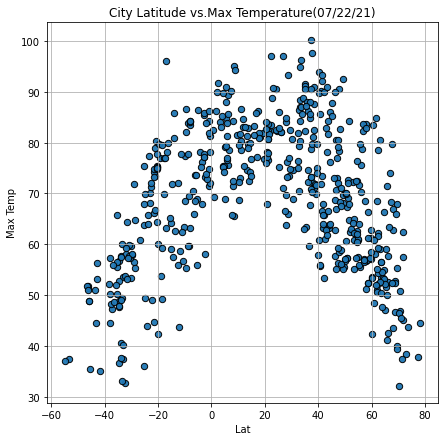

In [52]:
clean_city_data.plot(kind="scatter", x="Lat", y="Max Temp", 
                     grid=True, figsize=(7,7),marker="o", 
                     facecolors="red", edgecolors="black",
                     title="City Latitude vs.Max Temperature(07/22/21)",
                     alpha=0.95,s = 40)
plt.savefig("output_data/Fig 1.png")
plt.show()

####  Analysis on the above Latitude vs. Max Temp plot
* The above plot shows the relationship between Latitude and Temperatures in the selected cities 
* As a general trend the hottest temperatures occurred near the equator.  Interestingly, the hottest temperatures grouped around latitudes (+20 degrees) slightly north of the equator. As you move away from the equator the maximum temperature gradually decreases, while in cities father away from the equator it gets way too cooler. 
* Interestingly, latitudes further from the equador in the north have lower temperatures than those further from the equador in the south. This is most likely because there are simply more cities in the northern end of the hemisphere, while the southern hemisphere is Antarctica, where there are no cities.

## Latitude vs. Humidity Plot

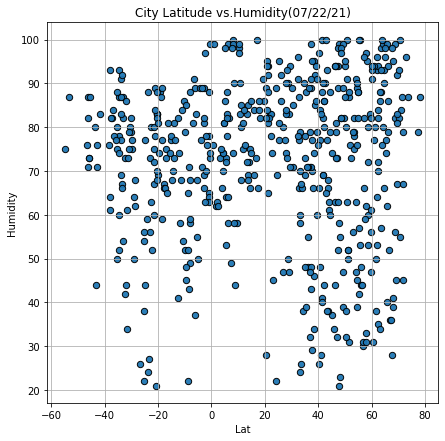

In [53]:
clean_city_data.plot(kind="scatter", x="Lat", y="Humidity", 
                     grid=True, figsize=(7,7),marker="o", 
                     facecolors="red", edgecolors="black",
                     title="City Latitude vs.Humidity(07/22/21)",
                     alpha=0.95,s = 40)
plt.savefig("output_data/Fig 2.png")
plt.show()

#### Analysis on the above Latitude vs. Humidity plot
----
* The visualization shows a great variety of humidity percentages at different latitudes. 
* Humidity appears to be mostly regular across latitudes. We can that there is no statistically significant relationship between humidity and latitude.Humidity does not show a strong correlation to latitude.Therefore, we cannot conclude that there is a conclusive pattern between humidity and latitude.

## Latitude vs. Cloudiness Plot

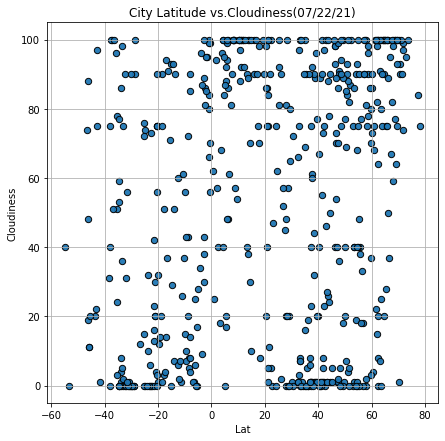

In [54]:
clean_city_data.plot(kind="scatter", x="Lat", y="Cloudiness", 
                     grid=True, figsize=(7,7),marker="o", 
                     facecolors="red", edgecolors="black",
                     title="City Latitude vs.Cloudiness(07/22/21)",
                     alpha=0.95,s = 40)
plt.savefig("output_data/Fig3.png")
plt.show()

#### Analysis on the above Latitude vs. Cloudiness plot
----
* There was no correlation between city latitude and the cloudiness of a city. Interestingly, the likelihood of an equatorial city cloudiness (%) near zero was very low. 
* Interestingly, cloudiness seems to cluster around 0% and 100%.

## Latitude vs. Wind Speed Plot

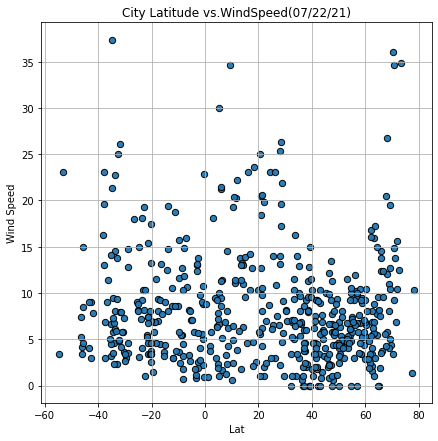

In [55]:
clean_city_data.plot(kind="scatter", x="Lat", y="Wind Speed",
                     grid=True, figsize=(7,7),marker="o", 
                     facecolors="red", edgecolors="black",
                     title="City Latitude vs.WindSpeed(07/22/21)",
                     alpha=0.95,s = 40)
plt.savefig("output_data/Fig4.png")
plt.show()

#### Analysis on the above Latitude vs. Windspeed plot
----
* There are no clear patterns or relationships between latitude and wind speed
* Interestingly, wind speeds look to be lower the closer a location is to the equator. The northern hemisphere seems to have      more instances of high wind speeds than the souther hemisphere. 
* Wind appears to increase moderately as distance from the equator increases, with higher highs closer to the poles, and more concentrated lows near the equator.




## Linear Regression

In [56]:
#Getting the city data for Northern Hemisphere
Nothern_Hemisphere_data = clean_city_data.loc[clean_city_data["Lat"]>=0]
Nothern_Hemisphere_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,76.73,86,90,10.36,US,1627103690
1,High Level,58.5169,-117.1360,66.31,72,90,3.44,CA,1627103706
4,Hong Kong,22.2855,114.1577,96.96,78,5,1.99,HK,1627103655
5,Pangnirtung,66.1451,-65.7125,42.51,79,50,3.74,CA,1627103707
7,Khatanga,71.9667,102.5000,62.37,45,99,10.38,RU,1627103707


In [57]:
#Getting the city data for Southern Hemisphere
Southern_Hemisphere_data = clean_city_data.loc[clean_city_data["Lat"]<0]
Southern_Hemisphere_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Port Alfred,-33.5906,26.8910,49.51,67,36,8.08,ZA,1627103706
3,Tuatapere,-46.1333,167.6833,51.82,82,88,4.21,NZ,1627103706
6,Punta Arenas,-53.1500,-70.9167,37.51,87,0,23.02,CL,1627103635
8,Cidreira,-30.1811,-50.2056,59.70,79,0,3.58,BR,1627103708
9,Mataura,-46.1927,168.8643,51.48,87,48,3.38,NZ,1627103708


###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.43185321041735614


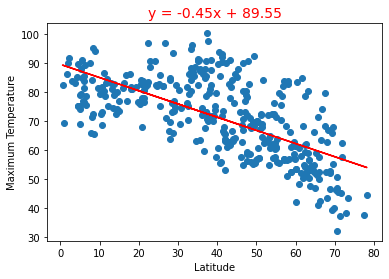

(Northern Hemisphere  - Max Temp vs. Latitude)R square value is: 0.43185321041735614
(Northern Hemisphere  - Max Temp vs. Latitude)Linear Regression is: y = -0.45x + 89.55


In [58]:
x_values = Nothern_Hemisphere_data['Lat']
y_values = Nothern_Hemisphere_data['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'{line_eq}',color = 'r', fontsize = 14)
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/Fig 5.png")
plt.show()
print(f"\033[1m(Northern Hemisphere  - Max Temp vs. Latitude)R square value is:\033[1m {rvalue**2}" )
print(f"\033[1m(Northern Hemisphere  - Max Temp vs. Latitude)Linear Regression is:\033[1m {line_eq}" )

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4990429304797893


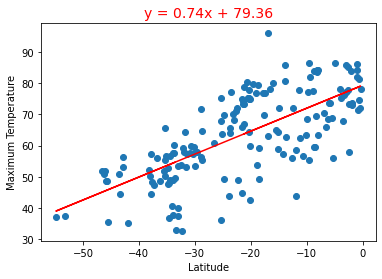

(Southern Hemisphere- Max Temp vs. Latitude)R square value is: 0.4990429304797893
(Southern Hemisphere- Max Temp vs. Latitude)Linear Regression is: y = 0.74x + 79.36


In [59]:
x_values = Southern_Hemisphere_data['Lat']
y_values = Southern_Hemisphere_data['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.title(f'{line_eq}',color = 'r', fontsize = 14)
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/Fig 6.png")
plt.show()
print(f"\033[1m(Southern Hemisphere- Max Temp vs. Latitude)R square value is:\033[1m {rvalue**2}" )
print(f"\033[1m(Southern Hemisphere- Max Temp vs. Latitude)Linear Regression is:\033[1m {line_eq}" )

#### Analysis on the above  figure Latitude vs. Maximum temperatures on Northern and Southern Hemisphere
----
* When checking linear regression, Maximum Temperature and latitude has a weak Correlation in Nothern Hemisphere while has a Moderate Correlation in southern hemisphere. 
* In both the hemispheres there is drop in temperatures as the cities move away from the equator, The linear regression lines shows a steeper slope for the northern hemisphere which indicates that there is a steeper drop in temperature in the North as you move further from the Equator.


###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.008241600808960662


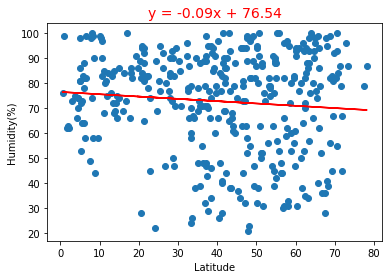

(Northern Hemisphere  - Humidity (%) vs. Latitude)R square value is: 0.008241600808960662
(Northern Hemisphere  - Humidity (%) vs. Latitude)Linear Regression is: y = -0.09x + 76.54


In [60]:
x_values = Nothern_Hemisphere_data['Lat']
y_values = Nothern_Hemisphere_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'{line_eq}',color = 'r', fontsize = 14)
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/Fig 7.png")
plt.show()
print(f"\033[1m(Northern Hemisphere  - Humidity (%) vs. Latitude)R square value is:\033[1m {rvalue**2}" )
print(f"\033[1m(Northern Hemisphere  - Humidity (%) vs. Latitude)Linear Regression is:\033[1m {line_eq}" )

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0031879118268838456


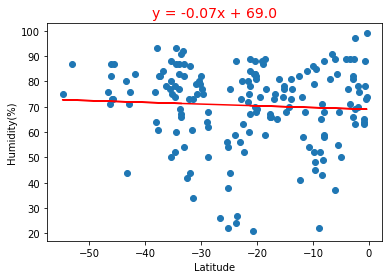

(Southern Hemisphere- Humidity (%) vs. Latitude)R square value is: 0.0031879118268838456
(Southern Hemisphere- Humidity (%) vs. Latitude)Linear Regression is: y = -0.07x + 69.0


In [61]:
x_values = Southern_Hemisphere_data['Lat']
y_values = Southern_Hemisphere_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'{line_eq}',color = 'r', fontsize = 14)
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/Fig 8.png")
plt.show()
print(f"\033[1m(Southern Hemisphere- Humidity (%) vs. Latitude)R square value is:\033[1m {rvalue**2}" )
print(f"\033[1m(Southern Hemisphere- Humidity (%) vs. Latitude)Linear Regression is:\033[1m {line_eq}" )

#### Analysis on the above  figure Latitude vs. Humidity on Northern and Southern Hemisphere
----
* When checking liner regression, humidity and latitude has almost no correlation in both of northern hemisphere and southern hemisphere.



###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 5.329862912342642e-05


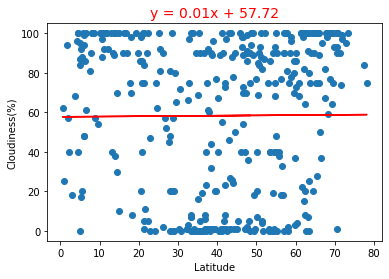

(Northern Hemisphere  - Cloudiness(%) vs. Latitude)R square value is: 5.329862912342642e-05
(Northern Hemisphere  - Cloudiness(%) vs. Latitude)Linear Regression is: y = 0.01x + 57.72


In [62]:
x_values = Nothern_Hemisphere_data['Lat']
y_values = Nothern_Hemisphere_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'{line_eq}',color = 'r', fontsize = 14)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/Fig 9.png")
plt.show()
print(f"\033[1m(Northern Hemisphere  - Cloudiness(%) vs. Latitude)R square value is:\033[1m {rvalue**2}" )
print(f"\033[1m(Northern Hemisphere  - Cloudiness(%) vs. Latitude)Linear Regression is:\033[1m {line_eq}" )

### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.021920407735195043


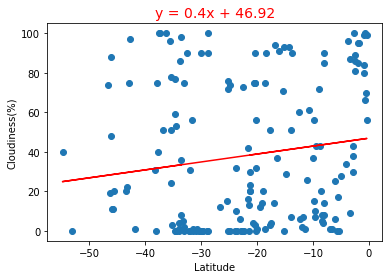

(Southern Hemisphere- Cloudiness(%) vs. Latitude)R square value is: 0.021920407735195043
(Southern Hemisphere- Cloudiness(%) vs. Latitude)Linear Regression is: y = 0.4x + 46.92


In [63]:
x_values = Southern_Hemisphere_data['Lat']
y_values = Southern_Hemisphere_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'{line_eq}',color = 'r', fontsize = 14)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/Fig 10 .png")
plt.show()
print(f"\033[1m(Southern Hemisphere- Cloudiness(%) vs. Latitude)R square value is:\033[1m {rvalue**2}" )
print(f"\033[1m(Southern Hemisphere- Cloudiness(%) vs. Latitude)Linear Regression is:\033[1m {line_eq}" )

#### Analysis on the above  figure Latitude vs. Cloudiness on Northern and Southern Hemisphere
----
* When checking liner regression, cloudiness and latitude has almost no correlation in both of northern hemisphere and southern hemisphere.


###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.006448223796759086


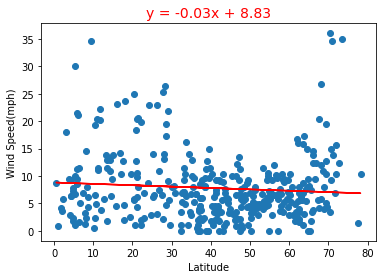

(Northern Hemisphere - Wind Speed(mph) vs. Latitude)R square value is: 0.006448223796759086
(Northern Hemisphere - Wind Speed(mph) vs. Latitude)Linear Regression is: y = -0.03x + 8.83


In [64]:
x_values = Nothern_Hemisphere_data['Lat']
y_values = Nothern_Hemisphere_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'{line_eq}',color = 'r', fontsize = 14)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
northern_hemisphere_rvalue = rvalue**2
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/Fig 11.png")
plt.show()
print(f"\033[1m(Northern Hemisphere - Wind Speed(mph) vs. Latitude)R square value is:\033[1m {rvalue**2}" )
print(f"\033[1m(Northern Hemisphere - Wind Speed(mph) vs. Latitude)Linear Regression is:\033[1m {line_eq}" )

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017765154561967516


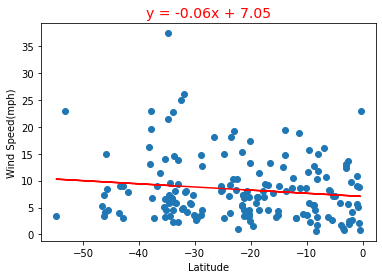

(Southern Hemisphere-Wind Speed(mph) vs. Latitude)R square value is: 0.017765154561967516
(Southern Hemisphere-Wind Speed(mph) vs. Latitude)Linear Regression is: y = -0.06x + 7.05


In [65]:
x_values = Southern_Hemisphere_data['Lat']
y_values = Southern_Hemisphere_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'{line_eq}',color = 'r', fontsize = 14)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/Fig 12.png")
plt.show()
print(f"\033[1m(Southern Hemisphere-Wind Speed(mph) vs. Latitude)R square value is:\033[1m {rvalue**2}" )
print(f"\033[1m(Southern Hemisphere-Wind Speed(mph) vs. Latitude)Linear Regression is:\033[1m {line_eq}" )

#### Analysis on the above  figure Latitude vs. Windspeed on Northern and Southern Hemisphere
----
* When checking liner regression, wind speed and latitude has almost no correlation in both of northern hemisphere and southern hemisphere.

